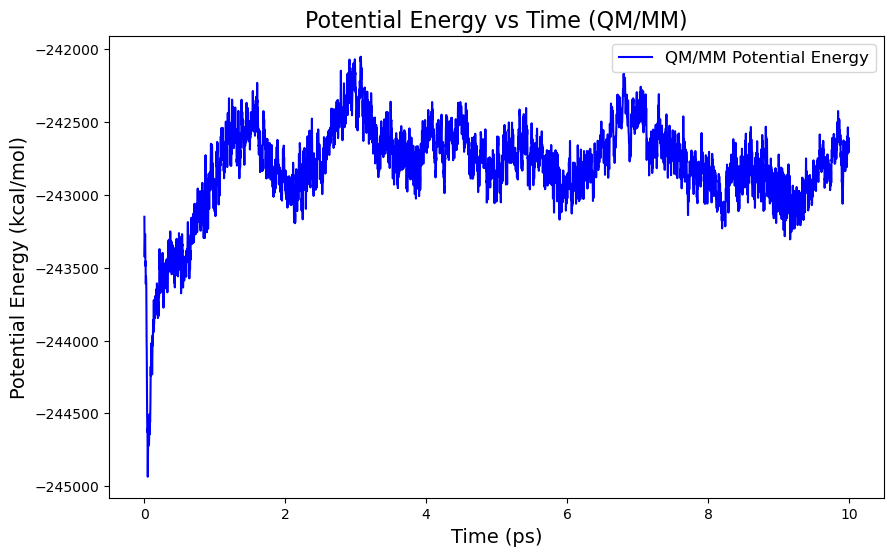

Potential Energy plot saved at: /scratch/wx2237/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Figures/qmmm_potential_energy_vs_time.png


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 文件路径
energy_file = '/scratch/wx2237/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/monitor/MONITOR-1.ener'

# 读取数据
data = np.loadtxt(energy_file, skiprows=1)
time_fs = data[:, 0]  # 时间（飞秒）
potential_energy_au = data[:, 4]  # 势能（a.u.）

# 单位转换
time_ps = time_fs / 1000  # 飞秒转皮秒
potential_energy_kcal = potential_energy_au * 627.509  # a.u. 转 kcal/mol

# 绘制势能 vs 时间
plt.figure(figsize=(10, 6))
plt.plot(time_ps, potential_energy_kcal, label='QM/MM Potential Energy', color='blue')

# 添加标签和图例
plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('Potential Energy (kcal/mol)', fontsize=14)
plt.title('Potential Energy vs Time (QM/MM)', fontsize=16)
plt.legend(fontsize=12)

# 确保输出目录存在
output_dir = '/scratch/wx2237/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Figures'
os.makedirs(output_dir, exist_ok=True)

# 保存图片
output_path = os.path.join(output_dir, 'qmmm_potential_energy_vs_time.png')
plt.savefig(output_path, dpi=300)
plt.show()

print(f"Potential Energy plot saved at: {output_path}")

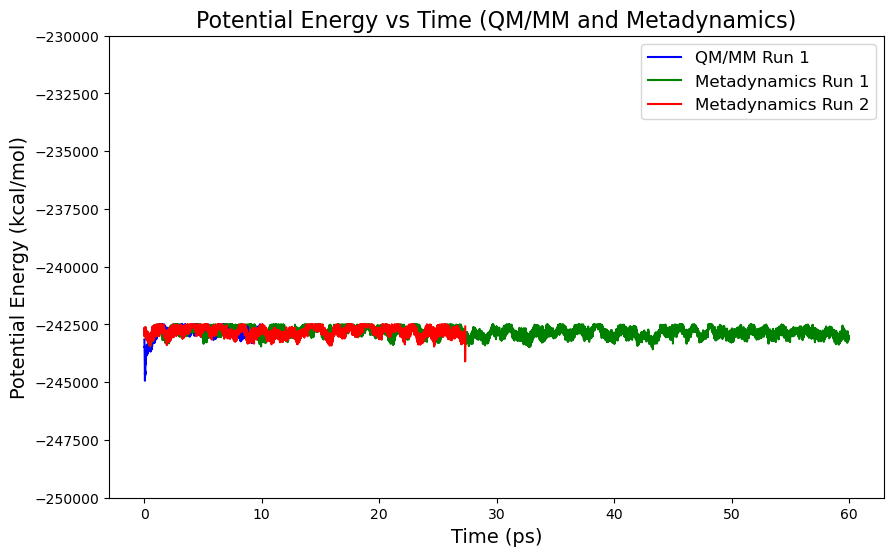

Potential Energy plot saved at: /scratch/wx2237/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Figures/qmmm_metadynamics_potential_energy_vs_time_filtered.png


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 定义文件路径
energy_files = [
    '/scratch/wx2237/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/monitor/MONITOR-1.ener',
    '/scratch/wx2237/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/metad1_initmonitor/METADYN-1.ener',
    '/scratch/wx2237/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Outputs/metad1_initmonitor_freqhills/METADYN-1.ener'
]

# 定义标签和颜色
labels = ['QM/MM Run 1', 'Metadynamics Run 1', 'Metadynamics Run 2']
colors = ['blue', 'green', 'red']

# 绘制图像
plt.figure(figsize=(10, 6))

# 遍历文件，加载数据并绘制曲线
for i, energy_file in enumerate(energy_files):
    data = np.loadtxt(energy_file, skiprows=1)
    time_fs = data[:, 0]  # 时间（飞秒）
    potential_energy_au = data[:, 4]  # 势能（a.u.）

    # 单位转换
    time_ps = time_fs / 1000  # 飞秒转皮秒
    potential_energy_kcal = potential_energy_au * 627.509  # a.u. 转 kcal/mol

    # 过滤大于 -240000 kcal/mol 的异常值
    valid_indices = potential_energy_kcal <= -242500
    time_ps = time_ps[valid_indices]
    potential_energy_kcal = potential_energy_kcal[valid_indices]

    # 绘制曲线
    plt.plot(time_ps, potential_energy_kcal, label=labels[i], color=colors[i])

# 添加图例和标签
plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('Potential Energy (kcal/mol)', fontsize=14)
plt.title('Potential Energy vs Time (QM/MM and Metadynamics)', fontsize=16)
plt.legend(fontsize=12)

# 设置 Y 轴范围
plt.ylim(-250000, -230000)

# 确保输出目录存在
output_dir = '/scratch/wx2237/comp-lab-class/comp-lab-class-2024/Week13-QMMM/Figures'
os.makedirs(output_dir, exist_ok=True)

# 保存图片
output_path = os.path.join(output_dir, 'qmmm_metadynamics_potential_energy_vs_time_filtered.png')
plt.savefig(output_path, dpi=300)
plt.show()

print(f"Potential Energy plot saved at: {output_path}")